<a href="https://colab.research.google.com/github/nicklausmillican/StatisticalRethinkingIISolutions/blob/main/StatisticalRethinkingSolutions2_Ch14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Checking versions of g++ and make
system("g++ --version", intern = TRUE)
system("make --version", intern = TRUE)

# Install g++ and make if needed
system("sudo apt install g++", intern = TRUE)
system("sudo apt install make", intern = TRUE)


[1] "g++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0"                                  
[2] "Copyright (C) 2021 Free Software Foundation, Inc."                          
[3] "This is free software; see the source for copying conditions.  There is NO" 
[4] "warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE."
[5] ""

[1] "GNU Make 4.3"                                                                 
[2] "Built for x86_64-pc-linux-gnu"                                                
[3] "Copyright (C) 1988-2020 Free Software Foundation, Inc."                       
[4] "License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>"
[5] "This is free software: you are free to change and redistribute it."           
[6] "There is NO WARRANTY, to the extent permitted by law."

[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "g++ is already the newest version (4:11.2.0-1ubuntu1)."         
[5] "g++ set to manually installed."                                 
[6] "0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded."

[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "make is already the newest version (4.3-4.1build1)."            
[5] "make set to manually installed."                                
[6] "0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded."

In [2]:
# Install cmdstanr from GitHub
if (!require(cmdstanr)) {
  devtools::install_github("stan-dev/cmdstanr")
}

# Set up CmdStan if it's not already set up
library(cmdstanr)
if (!cmdstanr::cmdstan_version()) {
  cmdstanr::install_cmdstan()
}

# Verify installation
cmdstanr::check_cmdstan_toolchain()


Loading required package: cmdstanr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘cmdstanr’”



numDeriv     (NA -> 2016.8-1.1) [CRAN]
matrixStats  (NA -> 1.5.0     ) [CRAN]
distribut... (NA -> 0.5.0     ) [CRAN]
tensorA      (NA -> 0.36.2.1  ) [CRAN]
checkmate    (NA -> 2.3.2     ) [CRAN]
abind        (NA -> 1.4-8     ) [CRAN]
posterior    (NA -> 1.6.0     ) [CRAN]


Installing 7 packages: numDeriv, matrixStats, distributional, tensorA, checkmate, abind, posterior

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmpa7RH04/remotes5361c83c0d7/stan-dev-cmdstanr-ce58981/DESCRIPTION’ ... OK
* preparing ‘cmdstanr’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘cmdstanr_0.8.1.9000.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

This is cmdstanr version 0.8.1.9000

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan



ERROR: Error: CmdStan path has not been set yet. See ?set_cmdstan_path.


IF YOU ENCOUNTER AN ERROR, JUST KEEP RUNNING CODE BELOW.

In [3]:
# Install CmdStan using cmdstanr
library(cmdstanr)
cmdstanr::install_cmdstan()

# After installation, set the CmdStan path
cmdstan_path <- cmdstanr::cmdstan_path()
cmdstanr::set_cmdstan_path(cmdstan_path)

# Verify the installation
cmdstanr::cmdstan_version()


The C++ toolchain required for CmdStan is setup properly!

* Latest CmdStan release is v2.36.0

* Installing CmdStan v2.36.0 in /root/.cmdstan/cmdstan-2.36.0

* Downloading cmdstan-2.36.0.tar.gz from GitHub...

* Download complete

* Unpacking archive...

* Building CmdStan binaries...



g++ -Wno-deprecated-declarations -std=c++17 -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes -Wno-class-memaccess      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.4.0 -I stan/lib/stan_math/lib/boost_1.84.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -MT bin/cmdstan/stansummary.o -MM -E -MG -MP -MF src/cmdstan/stansummary.d src/cmdstan/stansummary.cpp
cp bin/linux-stanc bin/stanc
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials -DNO_FPRINTF_OUTPUT     -O3  -c -x c -include stan/lib/stan_math/lib/sundials_6.1.1/include/stan_sundials_printf_override.hpp stan/lib/stan_math/lib/sundials_6.1.1/src/nvector/serial/nvector_serial.c -o stan/lib/stan_math/lib/sund

* Finished installing CmdStan to /root/.cmdstan/cmdstan-2.36.0


CmdStan path set to: /root/.cmdstan/cmdstan-2.36.0

CmdStan path set to: /root/.cmdstan/cmdstan-2.36.0



[1] "2.36.0"

In [4]:
# Install necessary packages
install.packages(c("coda", "mvtnorm", "devtools", "loo", "dagitty", "shape"))

# Load devtools for GitHub installation
library(devtools)

# Install rethinking from GitHub
devtools::install_github("rmcelreath/rethinking")


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘V8’


Loading required package: usethis





── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmpa7RH04/remotes53636779e27/rmcelreath-rethinking-ac1b3b2/DESCRIPTION’ ... OK
* preparing ‘rethinking’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘rethinking_2.42.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(rethinking)

Loading required package: posterior

This is posterior version 1.6.0


Attaching package: ‘posterior’


The following objects are masked from ‘package:stats’:

    mad, sd, var


The following objects are masked from ‘package:base’:

    %in%, match


Loading required package: parallel

rethinking (Version 2.42)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




In [6]:
# Test Installation

## Simulate some data for a binary outcome based on a single predictor
n <- 100
x <- rnorm(n)
prob <- 1 / (1 + exp(-x))
y <- rbinom(n, 1, prob)

## Fit a logistic regression using ulam
fit <- ulam(
  alist(
    y ~ bernoulli( p ),
    logit(p) <- a + b*x,
    a ~ normal(0, 1),
    b ~ normal(0, 1)
  ), data = list(x = x, y = y)
)

precis(fit)

Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.1 seconds.


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,0.1165243,0.2315951,-0.2268716,0.4950272,0.9995074,326.8885
b,1.1920970,0.2714594,0.7747448,1.6232727,1.0087132,343.0676


# Chapter 14

## Easy

### 14E1
Add to the following model varying slopes on the predictor $x$:  

$$y_i ∼ Normal(µ_i, σ)$$

$$µ_i = α_{group[i]} + βx_i$$

$$α_{group} ∼ Normal(α, σ_α)$$

$$α ∼ Normal(0, 10)$$

$$β ∼ Normal(0, 1)$$

$$σ ∼ Exponential(1)$$

$$σ_α ∼ Exponential(1)$$


#### Answer
I think this can be done most basically like:

$$\vdots$$

$$µ_i = α_{group[i]} + β_{group[i]}x_i$$

$$\vdots$$

$$β_{group} ∼ Normal(0, 1)$$

$$\vdots$$


We might even make this hierarchical like:

$$\vdots$$

$$µ_i = α_{group[i]} + β_{group[i]}x_i$$

$$\vdots$$

$$β_{group} ∼ Normal(\beta, \sigma_{\beta})$$

$$\vdots$$

$$\beta \sim Normal(0, 1)$$

$$\vdots$$

$$\sigma_\beta \sim Exponential(1)$$


But this chapter deals with covariance among parameters.  We can incorporate that like:
$$y_i ∼ Normal(µ_i, σ)$$

$$µ_i = α_{group[i]} + β_{group[i]}x_i$$

$$\begin{bmatrix}
\alpha_{group} \\
\beta_{group} \\
\end{bmatrix}
\sim
Normal_2 \left( \begin{bmatrix}
\alpha \\
\beta \\
\end{bmatrix},
\boldsymbol{S} \right)$$

$$\boldsymbol{S} = \begin{bmatrix}
\sigma_\alpha & 0 \\
0 & \sigma_\beta \\
\end{bmatrix} \boldsymbol{R}
\begin{bmatrix}
\sigma_\alpha & 0 \\
0 & \sigma_\beta \\
\end{bmatrix}$$

$$α ∼ Normal(0, 10)$$

$$β ∼ Normal(0, 1)$$

$$σ ∼ Exponential(1)$$

$$σ_α ∼ Exponential(1)$$

$$\sigma_\beta \sim Exponential(1)$$

$$\boldsymbol{R} \sim LKJcorr(2)$$


### 14E2

Think up a context in which varying intercepts will be positively correlated with varying slopes.  Provide a mechanistic explanation for the correlation.


#### Answer

Of course, there are many possible answers, so I'll provide a weak one.  Take the height trajectories of 14 year olds.  By 14, many have hit their puberty growth spurt and many have not.  Hence, it may be that the tallest 14 year olds are closest to their adult height such that they tend to grow the least from that point on.  This would result in a negative correlation between intercepts (height at 14 years old) and slope (growth trajectory).

### 14E3

When is it possible for a varying slopes model to have fewer effective parameters (as estimated by WAIC or PSIS) than the corresponding model with fixed (unpooled) slopes?  Explain.

#### Answer

The "effective number of parameters" is the same as the "penalty" (in WAIC/PSIS/CV) for a model.  Roughly speaking, the more parameters used to fit a model, the larger penalty that model should incur because more parameters lend to a more flexible model.

Another way to think about the penalty is as being proportional to the ratio

$$\text{penalty} \propto \frac{\text{volume(prior space)}}{\text{volume(posterior space)}}$$

A highly-flexible model will have a large space of prior possibilities which can shrink tightly to a small space of posterior possibilities.

The penalty refers to the predicted ability of the model to generalize to new data.  This should make sense because a highly-flexible model will tightly fit the data at hand, which is likely to mean it will struggle to fit other data.  This does not mean that a model with more effective parameters is automatically a worse model than one with fewer effective parameters: a model's penalty *eats* away at its "log pointwise predictive density" (lppd), which measures the model's fit to data; so a model with larger penalty may yet be preferred if the penalty incurred by increasing flexibility is sufficiently compensated by an increase in the lppd.


Right away, we should assume that varying-slopes (or intercepts) should have more effective parameters than fixed slopes; whereas a fixed slope is 1 parameter, varying-slopes is possibly 1 parameter for every level/cluster/panel.  But we need a little more nuance.  The estimated number of parameters from a single fixed slope should really be cashed out in the flexibility it lends to the model; a more permissive prior will grant more flexibility and hence more effective parameters.  If the levels/clusters/panels are very similar, and constructed hierarchically such that their priors are *informed by the data*, then the prior volume of the varying intercepts can actually be more restrictive than the single fixed slope.

## Medium

#### 14M1

Repeat the café robot simulation from the beginning of the chapter. This time, set `rho` to zero,  so that there is no correlation between intercepts and slopes. How does the posterior distribution of the correlation reflect this change in the underlying simulation?

### Answer
Let's first get the old data together.

In [ ]:
a <- 3.5
b <- (-1)
sigma_a <- 1
sigma_b <- 0.5
rho <- (-0.7)

Mu <- c(a,b)
cov_ab <- sigma_a * sigma_b * rho
Sigma <- matrix(c(sigma_a^2, cov_ab, cov_ab, sigma_b^2), ncol=2)

N_cafes <- 20

library(MASS)
set.seed(5)

vary_effects <- mvrnorm(N_cafes, Mu, Sigma)
a_cafe <- vary_effects[,1]
b_cafe <- vary_effects[,2]

set.seed(22)
N_visits <- 10
afternoon <- rep(0:1, N_visits*N_cafes/2)
cafe_id <- rep(1:N_cafes, each=N_visits)
mu <- a_cafe[cafe_id] + b_cafe[cafe_id]*afternoon
sigma <- 0.5
wait <- rnorm(N_visits*N_cafes, mu, sigma)
d <- data.frame(cafe=cafe_id, afternoon=afternoon, wait=wait)

Now let's replicate the old analysis and get the posterior samples.

In [ ]:
set.seed(867530)
m14.1 <- ulam(
  alist(
    wait ~ normal(mu, sigma),
      mu <- a_cafe[cafe] + b_cafe[cafe]*afternoon,
        c(a_cafe, b_cafe)[cafe] ~ multi_normal(c(a,b), Rho, sigma_cafe),
          a ~ normal(5,2),
          b ~ normal(-1, 0.5),
          sigma_cafe ~ exponential(1),
          sigma ~ exponential(1),
          Rho ~ lkj_corr(2)
    ), data=d,
       chains=4,
       cores=4,
       iter=1000
)
post <- extract.samples(m14.1)

Now we repeat, but `rho <- 0`

In [ ]:
a <- 3.5
b <- (-1)
sigma_a <- 1
sigma_b <- 0.5
rho <- 0

Mu <- c(a,b)
cov_ab <- sigma_a * sigma_b * rho
Sigma <- matrix(c(sigma_a^2, cov_ab, cov_ab, sigma_b^2), ncol=2)

N_cafes <- 20

library(MASS)
set.seed(5)

vary_effects <- mvrnorm(N_cafes, Mu, Sigma)
a_cafe <- vary_effects[,1]
b_cafe <- vary_effects[,2]

set.seed(22)
N_visits <- 10
afternoon <- rep(0:1, N_visits*N_cafes/2)
cafe_id <- rep(1:N_cafes, each=N_visits)
mu <- a_cafe[cafe_id] + b_cafe[cafe_id]*afternoon
sigma <- 0.5
wait <- rnorm(N_visits*N_cafes, mu, sigma)
d <- data.frame(cafe=cafe_id, afternoon=afternoon, wait=wait)

In [ ]:
set.seed(867530)
m14M1 <- ulam(
  alist(
    wait ~ normal(mu, sigma),
      mu <- a_cafe[cafe] + b_cafe[cafe]*afternoon,
        c(a_cafe, b_cafe)[cafe] ~ multi_normal(c(a,b), Rho, sigma_cafe),
          a ~ normal(5,2),
          b ~ normal(-1, 0.5),
          sigma_cafe ~ exponential(1),
          sigma ~ exponential(1),
          Rho ~ lkj_corr(2)
    ), data=d,
       chains=4,
       cores=4,
       iter=1000
)
post2 <- extract.samples(m14M1)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/RtmpJEQt81/model-1211aa0a407.stan', line 17, column 4 to column 24)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/RtmpJEQt81/model-1211aa0a407.stan', line 17, column 4 to column 24)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/RtmpJEQt81/model-1211aa0a407.stan', line 17, column 4 to column 24)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occu

Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/RtmpJEQt81/model-1211aa0a407.stan', line 17, column 4 to column 24)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/RtmpJEQt81/model-1211aa0a407.stan', line 17, column 4 to column 24)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/RtmpJEQt81/model-1211aa0a407.stan', line 17, column 4 to column 24)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occu

Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 

Now let's plot the posteriors for `Rho`.

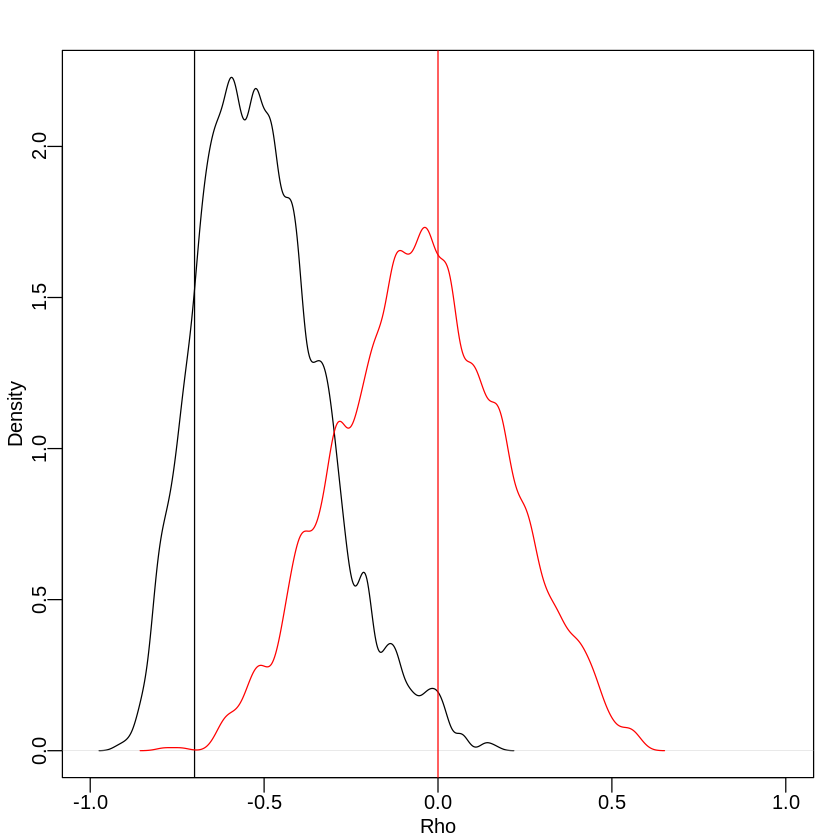

In [ ]:
dens(post$Rho[,1,2], xlab="Rho", xlim=c(-1,1))
  abline(v=-0.7)
dens(post2$Rho[,1,2], add=TRUE, col="red")
  abline(v=0, col="red")

So the `rho <- -0.7` model estimates `Rho` to be pulled towards `0`.  But the `rho <- 0` model does not seem to drag the esimate away from `0`.  What's going on?  This is the work of `lkj_corr(2)`, which makes the model skeptical of extreme correlations, so the `rho <- 0.7`, being somewhat extreme, is pulled towards 0; meanwhile, the `rho <- 0`, being as far from extreme as possible`, is not shifted.

#### 14M2

Fit this multilevel model to the simulated café data:  
$$W_i ∼ Normal(µ_i, σ)$$
$$µ_i = α_{café[i]} + β_{café[i]} A_i$$
$$α_{café} ∼ Normal(α, σ_α)$$
$$β_{café} ∼ Normal(β, σ_β)$$
$$α ∼ Normal(0, 10)$$
$$β ∼ Normal(0, 10)$$
$$σ, σ_α, σ_β ∼ Exponential(1)$$

Use WAIC to compare this model to the model from the chapter, the one that uses a multi-variate  Gaussian prior. Explain the result.

##### Answer

In [ ]:
a <- 3.5
b <- (-1)
sigma_a <- 1
sigma_b <- 0.5
rho <- (-0.7)

Mu <- c(a,b)
cov_ab <- sigma_a * sigma_b * rho
Sigma <- matrix(c(sigma_a^2, cov_ab, cov_ab, sigma_b^2), ncol=2)

N_cafes <- 20

library(MASS)
set.seed(5)

vary_effects <- mvrnorm(N_cafes, Mu, Sigma)
a_cafe <- vary_effects[,1]
b_cafe <- vary_effects[,2]

set.seed(22)
N_visits <- 10
afternoon <- rep(0:1, N_visits*N_cafes/2)
cafe_id <- rep(1:N_cafes, each=N_visits)
mu <- a_cafe[cafe_id] + b_cafe[cafe_id]*afternoon
sigma <- 0.5
wait <- rnorm(N_visits*N_cafes, mu, sigma)
d <- data.frame(cafe=cafe_id, afternoon=afternoon, wait=wait)

In [ ]:
m14.1 <- ulam(
  alist(
    wait ~ normal(mu, sigma),
      mu <- a_cafe[cafe] + b_cafe[cafe]*afternoon,
        c(a_cafe, b_cafe)[cafe] ~ multi_normal(c(a,b), Rho, sigma_cafe),
          a ~ normal(5,2),
          b ~ normal(-1, 0.5),
          sigma_cafe ~ exponential(1),
          sigma ~ exponential(1),
          Rho ~ lkj_corr(2)
    ), data=d,
       chains=4,
       cores=4,
       iter=1000,
       log_lik=TRUE
)

m14M2 <- ulam(
  alist(
    wait ~ dnorm(mu, sigma),
      mu <- a_cafe[cafe] + b_cafe[cafe]*afternoon,
        a_cafe[cafe] ~ dnorm(a, sigma_a),
          a ~ dnorm(0, 10),
          sigma_a ~ dexp(1),
        b_cafe[cafe] ~ dnorm(b, sigma_b),
          b ~ dnorm(0, 10),
          sigma_b ~ dexp(1),
      sigma ~ dexp(1)
  ), data=d,
     chains=4,
     cores=4,
     iter=1000,
     log_lik=TRUE
)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/Rtmpi3AvZt/model-257711568c6.stan', line 17, column 4 to column 24)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/Rtmpi3AvZt/model-257711568c6.stan', line 17, column 4 to column 24)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occu

Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/Rtmpi3AvZt/model-257711568c6.stan', line 17, column 4 to column 24)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/Rtmpi3AvZt/model-257711568c6.stan', line 17, column 4 to column 24)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occu

Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/Rtmpi3AvZt/model-257711568c6.stan', line 17, column 4 to column 24)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/Rtmpi3AvZt/model-257711568c6.stan', line 17, column 4 to column 24)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occu

Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/Rtmpi3AvZt/model-257711568c6.stan', line 17, column 4 to column 24)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/Rtmpi3AvZt/model-257711568c6.stan', line 17, column 4 to column 24)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occu

Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 500 / 1000 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/Rtmpi3AvZt/model-2577c57798c.stan', line 20, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/Rtmpi3AvZt/model-2577c57798c.stan', line 27, column 4 to column 32)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m14.1,304.9130,17.71993,0.000000,NA,32.76303,0.6715823
m14M2,306.3437,17.91722,1.430701,2.201485,32.42524,0.3284177


In [ ]:
compare(m14.1, m14M2, func=WAIC)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m14.1,304.9130,17.71993,0.000000,NA,32.76303,0.6715823
m14M2,306.3437,17.91722,1.430701,2.201485,32.42524,0.3284177


We see that `m14.1` is doing better.  Recall that the difference between these models is that `m14.1` assumed correlation among the parameters, whereas m14M2 did not.  Apparently, assuming the correlation creates a better fit.

### 14M3

Re-estimate the varying slopes model for the `UCBadmit` data, now using a non-centered parameterization. Compare the efficiency of the forms of the model, using `n_eff`. Which is better?  Which chain sampled faster?

#### Answer
I think this question is a mistake.  There is no such model in the book, let alone the chapter.

### 14M4

Use WAIC to compare the Gaussian process model of Oceanic tools to the models fit to the same data in Chapter 11.  Pay special attention to the effective numbers of parameters, as estimated by WAIC.

#### Answer
The first thing to do is get the models together.

In [ ]:
data(Kline2)
d <- Kline2
d$contact_id <- ifelse( d$contact=="high", 2, 1)
d$society <- 1:10

data(islandsDistMatrix)

dat_list <- list(T=d$total_tools,
                 P=d$population,
                 cid=d$contact_id,
                 society=d$society,
                 Dmat=islandsDistMatrix)

m11.11 <- ulam(
  alist(
    T ~ dpois(lambda),
      lambda <- exp(a[cid])*P^b[cid]/g,
        a[cid] ~ dnorm(1,1),
        b[cid] ~ dexp(1),
        g ~ dexp(1)
  ), data=dat_list,
     chains=4,
     cores=4,
     iter=2000,
     log_lik=TRUE)

m14.8 <- ulam(
  alist(
    T ~ dpois(lambda),
      lambda <- (a*P^b/g)*exp(k[society]),
        vector[10]:k ~ multi_normal(0, SIGMA),
          matrix[10,10]:SIGMA <- cov_GPL2(Dmat, etasq, rhosq, 0.01),
            etasq ~ dexp(2),
            rhosq ~ dexp(0.5),
        c(a,b,g) ~ dexp(1)
  ), data=dat_list,
     chains=4,
     cores=4,
     iter=2000,
     log_lik=TRUE)

compare(m11.11, m14.8)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m14.8,67.54318,2.323617,0.00000,NA,4.074928,0.998584449
m11.11,80.66082,11.335308,13.11764,11.26337,5.136625,0.001415551


The Gaussian process model not only takes the bulk of the weight, but also has fewer *effective parameters* (\~4 vs \~5)--which is interesting since it actually has more *real* parameters (15 vs 5).

### 14M5

Modify the phylogenetic distance example to use group size as the outcome and brain size as a predictor. Assuming brain size influences group size, what is your estimate of the effect? How does  phylogeny influence the estimate?

#### Answer

#### Basic Models
Here, we employ a kinda Gaussian process; but the correlation matrix is the identity matrix, which makes this basic regression.  The reason, I think, the book does it this way is to show that we can just change the correlation matrix to reflect a different relationship within the phylogeny.

In [ ]:
data(Primates301)
data(Primates301_nex)

d <- Primates301
d$name <- as.character(d$name)
dstan <- d[complete.cases(d$group_size, d$body, d$brain),]
spp_obs <- dstan$name

dat_list <- list(N_spp = nrow(dstan),
                 M = standardize(log(dstan$body)),
                 B = standardize(log(dstan$brain)),
                 G = standardize(log(dstan$group_size)),
                 Imat = diag(nrow(dstan)))

In [ ]:
m14.9 <- ulam(
  alist(
    B ~ multi_normal(mu, SIGMA),
      mu <- a + bM*M + bG*G,
        a ~ normal(0, 1),
        c(bM,bG) ~ normal(0, 0.5),
      matrix[N_spp,N_spp]: SIGMA <- Imat * sigma_sq,
        sigma_sq ~ exponential( 1)
  ), data=dat_list,
     chains=4,
     cores=4,
     iter=1000)

m14M5.9 <- ulam(
  alist(
    G ~ multi_normal(mu, SIGMA),
      mu <- a + bM*M + bB*B,
        a ~ normal(0, 1),
        c(bM,bB) ~ normal(0, 0.5),
      matrix[N_spp,N_spp]: SIGMA <- Imat * sigma_sq,
        sigma_sq ~ exponential(1)
  ), data=dat_list,
     chains=4,
     cores=4,
     iter=1000)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: multi_normal_lpdf: Covariance matrix is not symmetric. Covariance matrix[1,2] = -nan, but Covariance matrix[2,1] = -nan (in '/tmp/RtmpdLxWxS/model-118413275f6.stan', line 25, column 4 to column 35)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: multi_normal_lpdf: Covariance matrix is not symmetric. Covariance matrix[1,2] = -nan, but Covariance matrix[2,1] = -nan (in '/tmp/RtmpdLxWxS/model-118413275f6.stan', line 25, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 500 / 1000 [ 50%]

#### Brownian-motion models

So now we replace the `Imat` matrix with the Brownian `R` matrix.

,Allenopithecus_nigroviridis,Alouatta_belzebul,Alouatta_caraya,Alouatta_guariba,Alouatta_palliata,Alouatta_pigra,Alouatta_seniculus,Aotus_azarai,Aotus_trivirgatus,Arctocebus_calabarensis,⋯,Tarsius_syrichta,Theropithecus_gelada,Trachypithecus_cristatus,Trachypithecus_geei,Trachypithecus_johnii,Trachypithecus_obscurus,Trachypithecus_phayrei,Trachypithecus_pileatus,Trachypithecus_vetulus,Varecia_variegata_variegata
Allenopithecus_nigroviridis,1.0000000,0.3587687,0.3587687,0.3587687,0.3587687,0.3587687,0.3587687,0.3587687,0.3587687,0,⋯,0.05702485,0.7962388,0.7067193,0.7067193,0.7067193,0.7067193,0.7067193,0.7067193,0.7067193,0
Alouatta_belzebul,0.3587687,1.0000000,0.9467389,0.9374102,0.9531331,0.9531331,0.9467389,0.7079395,0.7079395,0,⋯,0.05702485,0.3587687,0.3587687,0.3587687,0.3587687,0.3587687,0.3587687,0.3587687,0.3587687,0
Alouatta_caraya,0.3587687,0.9467389,1.0000000,0.9374102,0.9467389,0.9467389,0.9604609,0.7079395,0.7079395,0,⋯,0.05702485,0.3587687,0.3587687,0.3587687,0.3587687,0.3587687,0.3587687,0.3587687,0.3587687,0
Alouatta_guariba,0.3587687,0.9374102,0.9374102,1.0000000,0.9374102,0.9374102,0.9374102,0.7079395,0.7079395,0,⋯,0.05702485,0.3587687,0.3587687,0.3587687,0.3587687,0.3587687,0.3587687,0.3587687,0.3587687,0
Alouatta_palliata,0.3587687,0.9531331,0.9467389,0.9374102,1.0000000,0.9783273,0.9467389,0.7079395,0.7079395,0,⋯,0.05702485,0.3587687,0.3587687,0.3587687,0.3587687,0.3587687,0.3587687,0.3587687,0.3587687,0
Alouatta_pigra,0.3587687,0.9531331,0.9467389,0.9374102,0.9783273,1.0000000,0.9467389,0.7079395,0.7079395,0,⋯,0.05702485,0.3587687,0.3587687,0.3587687,0.3587687,0.3587687,0.3587687,0.3587687,0.3587687,0


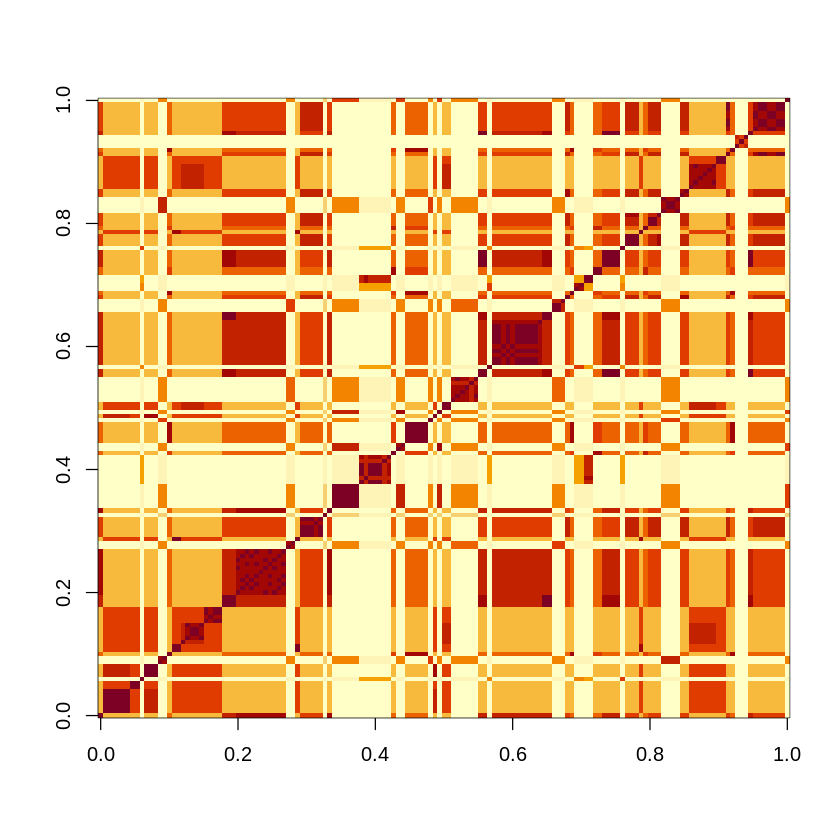

In [ ]:
install.packages("ape")
library(ape)
tree_trimmed <- keep.tip(Primates301_nex, spp_obs)
Rbm <- corBrownian(phy=tree_trimmed)
V <- vcv(Rbm)
Dmat <- cophenetic(tree_trimmed)

dat_list$V <- V[spp_obs, spp_obs]
dat_list$R <- dat_list$V / max(V)

head(dat_list$R)
image(dat_list$R)

In [ ]:
m14.10 <- ulam(
  alist(
    B ~ multi_normal(mu, SIGMA),
      mu <- a + bM*M + bG*G,
        a ~ normal(0, 1),
        c(bM,bG) ~ normal(0, 0.5),
    matrix[N_spp,N_spp]: SIGMA <- R * sigma_sq,
      sigma_sq ~ exponential(1)
    ), data=dat_list,
       chains=4,
       cores=4)

m14M5.10 <- ulam(
  alist(
    G ~ multi_normal(mu, SIGMA),
      mu <- a + bM*M + bB*B,
        a ~ normal(0, 1),
        c(bM,bB) ~ normal(0, 0.5),
    matrix[N_spp,N_spp]: SIGMA <- R * sigma_sq,
      sigma_sq ~ exponential(1)
    ), data=dat_list,
       chains=4,
       cores=4)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: multi_normal_lpdf: Covariance matrix is not symmetric. Covariance matrix[1,2] = inf, but Covariance matrix[2,1] = inf (in '/tmp/RtmpdLxWxS/model-11810b18077.stan', line 27, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: multi_normal_lpdf: Covariance matrix is not symmetric. Covariance matrix[1,2] = inf, but Covariance matrix[2,1] = inf (in '/tmp/RtmpdLxWxS/model-11810b18077.stan', line 27, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: multi_normal_lpdf: Covariance matrix is not symmetric. Covariance matrix[1,2] = inf, but Covariance matrix[2,1] = inf (in '/tmp/RtmpdLxWxS/model-11810b18077.stan', line 27, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for hig

Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  

#### OU Models

Finally, we employ a "proper" Gaussian process.

$$K(i,j) = \eta^2 \text{exp}(\rho^2 D_{i,j})$$

Let's look at this to see what's happening with our assume phylogenetic relationships as distance increases.

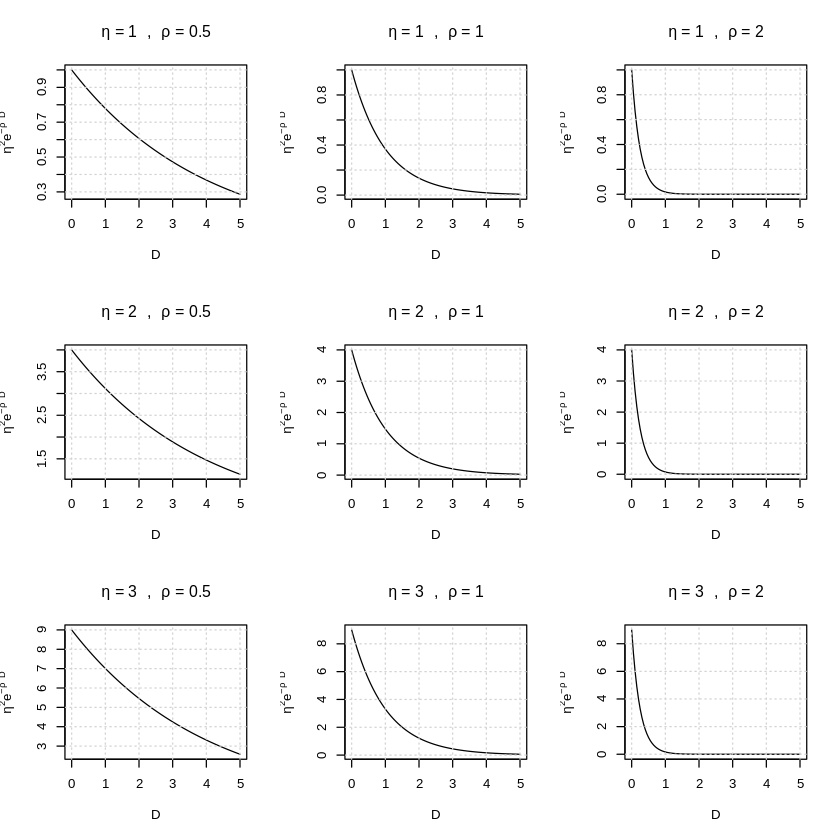

In [ ]:
eta_vals <- c(1, 2, 3)
rho_vals <- c(0.5, 1, 2)
D <- seq(0, 5, length.out=100)

par(mfrow=c(3,3))
for (eta in eta_vals){
  for (rho in rho_vals){
    y <- eta^2 * exp(-(rho^2) * D)

    plot(D, y, type = "l",
         main = bquote(eta == .(eta) ~ "," ~ rho == .(rho)),
         xlab = "D",
         ylab = expression(eta^2 * e^{-rho^2 * D}))

    grid()
  }
}

Depending the parameters, the similarity decreases slower as the distance grows.

,Allenopithecus_nigroviridis,Alouatta_belzebul,Alouatta_caraya,Alouatta_guariba,Alouatta_palliata,Alouatta_pigra,Alouatta_seniculus,Aotus_azarai,Aotus_trivirgatus,Arctocebus_calabarensis,⋯,Tarsius_syrichta,Theropithecus_gelada,Trachypithecus_cristatus,Trachypithecus_geei,Trachypithecus_johnii,Trachypithecus_obscurus,Trachypithecus_phayrei,Trachypithecus_pileatus,Trachypithecus_vetulus,Varecia_variegata_variegata
Allenopithecus_nigroviridis,0.0000000,0.64123131,0.64123130,0.64123130,0.64123131,0.64123131,0.64123130,0.6412313,0.6412313,1,⋯,0.9429751,0.2037611,0.2932807,0.2932807,0.2932807,0.2932807,0.2932807,0.2932807,0.2932807,1
Alouatta_belzebul,0.6412313,0.00000000,0.05326104,0.06258983,0.04686686,0.04686686,0.05326104,0.2920605,0.2920605,1,⋯,0.9429751,0.6412313,0.6412313,0.6412313,0.6412313,0.6412313,0.6412313,0.6412313,0.6412313,1
Alouatta_caraya,0.6412313,0.05326104,0.00000000,0.06258982,0.05326104,0.05326104,0.03953906,0.2920605,0.2920605,1,⋯,0.9429751,0.6412313,0.6412313,0.6412313,0.6412313,0.6412313,0.6412313,0.6412313,0.6412313,1
Alouatta_guariba,0.6412313,0.06258983,0.06258982,0.00000000,0.06258983,0.06258983,0.06258982,0.2920605,0.2920605,1,⋯,0.9429751,0.6412313,0.6412313,0.6412313,0.6412313,0.6412313,0.6412313,0.6412313,0.6412313,1
Alouatta_palliata,0.6412313,0.04686686,0.05326104,0.06258983,0.00000000,0.02167267,0.05326104,0.2920605,0.2920605,1,⋯,0.9429751,0.6412313,0.6412313,0.6412313,0.6412313,0.6412313,0.6412313,0.6412313,0.6412313,1
Alouatta_pigra,0.6412313,0.04686686,0.05326104,0.06258983,0.02167267,0.00000000,0.05326104,0.2920605,0.2920605,1,⋯,0.9429751,0.6412313,0.6412313,0.6412313,0.6412313,0.6412313,0.6412313,0.6412313,0.6412313,1


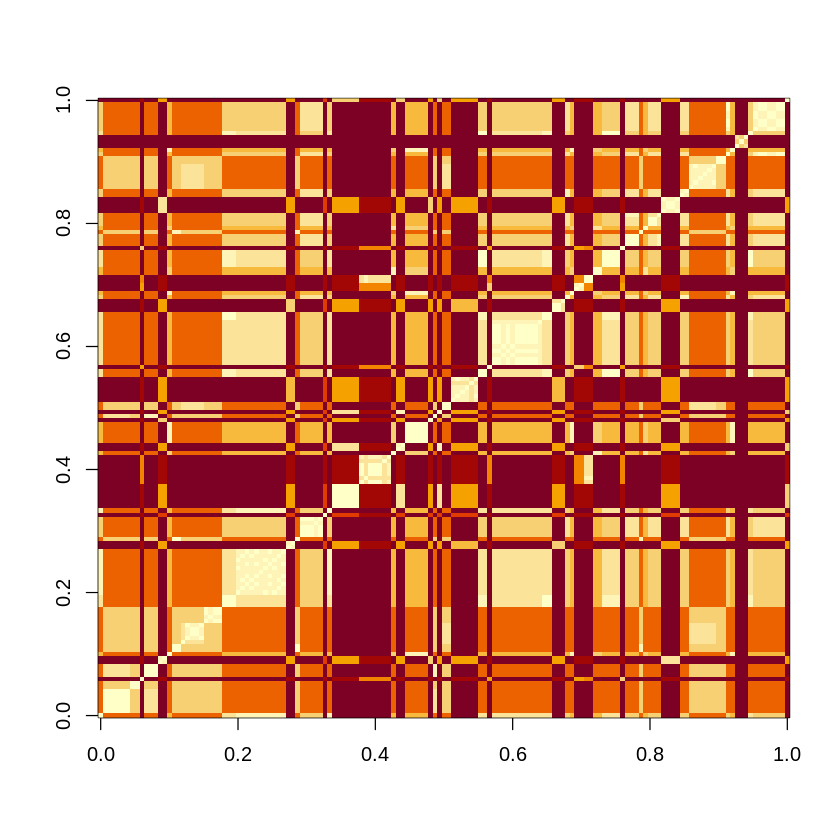

In [ ]:
dat_list$Dmat <- Dmat[spp_obs, spp_obs]/ max(Dmat)

head(dat_list$Dmat)
image(dat_list$Dmat)

In [ ]:
m14.11 <- ulam(
  alist(
    B ~ multi_normal(mu, SIGMA),
      mu <- a + bM*M + bG*G,
        a ~ normal(0,1),
        c(bM,bG) ~ normal(0,0.5),
      matrix[N_spp,N_spp]: SIGMA <- cov_GPL1(Dmat, etasq, rhosq, 0.01),
        etasq ~ half_normal(1,0.25),
        rhosq ~ half_normal(3,0.25)
    ), data=dat_list,
       chains=4,
       cores=4)

m14M5.11 <- ulam(
  alist(
    G ~ multi_normal(mu, SIGMA),
      mu <- a + bM*M + bB*B,
        a ~ normal(0,1),
        c(bM,bB) ~ normal(0,0.5),
      matrix[N_spp,N_spp]: SIGMA <- cov_GPL1(Dmat, etasq, rhosq, 0.01),
        etasq ~ half_normal(1,0.25),
        rhosq ~ half_normal(3,0.25)
    ), data=dat_list,
       chains=4,
       cores=4)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: multi_normal_lpdf: LDLT_Factor of covariance parameter is not positive definite.  last conditional variance is 0. (in '/tmp/RtmpdLxWxS/model-1183bcb5a96.stan', line 47, column 4 to column 35)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: multi_normal_lpdf: LDLT_Factor of covariance parameter is not positive definite.  last conditional variance is 0. (in '/tmp/RtmpdLxWxS/model-1183bcb5a96.stan', line 47, column 4 to column 35)

Chain 1 If this warning occurs sporadically, such as for highly cons

Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: multi_normal_lpdf: Covariance matrix is not symmetric. Covariance matrix[1,2] = -nan, but Covariance matrix[2,1] = -nan (in '/tmp/RtmpdLxWxS/model-1183bcb5a96.stan', line 47, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: multi_normal_lpdf: Covariance matrix is not symmetric. Covariance matrix[1,2] = -nan, but Covariance matrix[2,1] = -nan (in '/tmp/RtmpdLxWxS/model-1183bcb5a96.stan', line 47, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 500 / 1000 [ 50%]

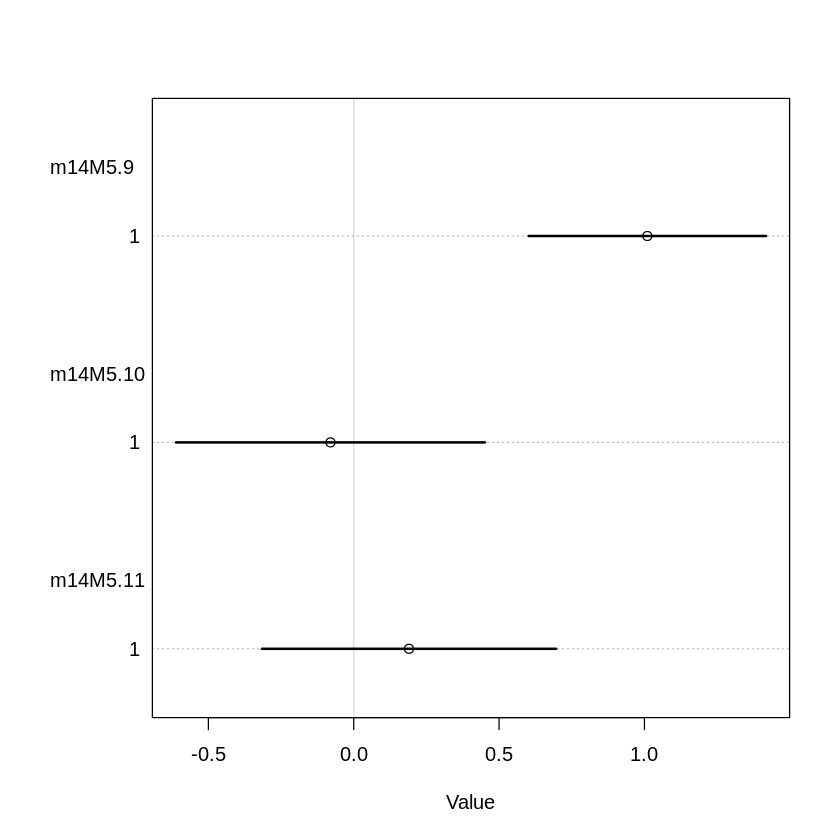

In [ ]:
plot(coeftab(m14M5.9, m14M5.10, m14M5.11), pars=c("bB"))

Probably as expected, after accounting for phylogeny, the associations between group size brain size (`bB`) is not as strong.  This should make sense because some of the information contained in these predictors from the non-phylogeny model is also contained in the phylogeny.  Hence, accounting for that information with phylogeny decreases the relevance of these predictors.

## Hard

### 14H1

Let’s revisit the Bangladesh fertility data, data(`bangladesh`), from the practice problems for  Chapter 13. Fit a model with both varying intercepts by `district_id` and varying slopes of urban by `district_id`. You are still predicting `use.contraception`. Inspect the correlation between the  intercepts and slopes. Can you interpret this correlation, in terms of what it tells you about the pattern of contraceptive use in the sample? It might help to plot the mean (or median) varying effect estimates for both the intercepts and slopes, by district. Then you can visualize the correlation and maybe more  easily think through what it means to have a particular correlation. Plotting predicted proportion of  women using contraception, with urban women on one axis and rural on the other, might also help.

#### Answer



In [ ]:
data(bangladesh)
d <- bangladesh
head(d)

,woman,district,use.contraception,living.children,age.centered,urban
,<int>,<int>,<int>,<int>,<dbl>,<int>
1,1,1,0,4,18.4400,1
2,2,1,0,1,-5.5599,1
3,3,1,0,3,1.4400,1
4,4,1,0,4,8.4400,1
5,5,1,0,1,-13.5590,1
6,6,1,0,1,-11.5600,1


In [ ]:
dlist <- list("district"=as.integer(as.factor(d$district)),
              "contraception"=d$use.contraception,
              "urban"=d$urban)

m <- ulam(
  alist(
    contraception ~ dbinom(1,p),
      logit(p) <- a[district] + b[district]*urban,
        c(a,b)[district] ~ multi_normal(c(mu_a, mu_b), Rho, Sigma),
          mu_a ~ dnorm(0,1),
          mu_b ~ dnorm(0,1),
          Rho ~ lkj_corr(2),
          Sigma ~ dexp(1)
  ), data=dlist,
     chains=4,
     cores=4,
     iter=1000
)
precis(m)

126 vector or matrix parameters hidden. Use depth=2 to show them.



,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mu_a,-0.7047372,0.1024504,-0.8687415,-0.5482902,0.9997438,1337.0054
mu_b,0.6944290,0.1714211,0.4199284,0.9699932,1.0018954,953.8892


I checked the convergnce of the model before proceeding.  Let's get the correlation between `a` and `b`.

In [ ]:
precis(m, depth=3, pars="Rho")[2,1]

[1] -0.6622119

In other words, urban areas are more likely to use contraception.  But, the effect of `urban` decreases as the district-baseline contraception use goes up.

How could it be any other way?  It couldn't.

### 14H2

Now consider the predictor variables `age.centered` and `living.children`, also contained  in `data(bangladesh)`. Suppose that age influences contraceptive use (changing attitudes) and number of children (older people have had more time to have kids). Number of children may also directly influence contraceptive use. Draw a DAG that reflects these hypothetical relationships. Then build  models needed to evaluate the DAG. You will need at least two models. Retain district and urban, as in 14H1. What do you conclude about the causal influence of age and children?

#### Answer

Let's get our data in order.

In [ ]:
data(bangladesh)
d <- bangladesh
head(d)

,woman,district,use.contraception,living.children,age.centered,urban
,<int>,<int>,<int>,<int>,<dbl>,<int>
1,1,1,0,4,18.4400,1
2,2,1,0,1,-5.5599,1
3,3,1,0,3,1.4400,1
4,4,1,0,4,8.4400,1
5,5,1,0,1,-13.5590,1
6,6,1,0,1,-11.5600,1


We need to add the new variables to our `dlist`.  Both age and children will require priors, and I don't know what they would be; so I'll standardize them.

In [ ]:
dlist <- list("district"=as.integer(as.factor(d$district)),
              "contraception"=d$use.contraception,
              "urban"=d$urban,
              "age"=standardize(d$age.centered),
              "children"=standardize(d$living.children))

Now let's make our DAG.

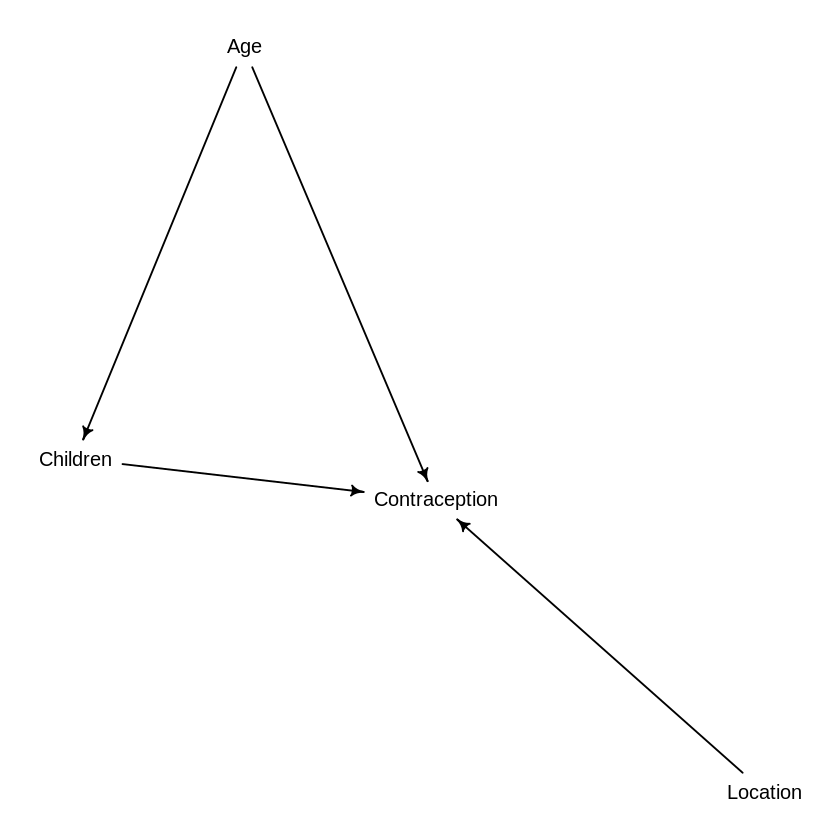

In [ ]:
library(dagitty)
dag <- dagitty("dag{Children -> Contraception <- Age -> Children;
                    Location -> Contraception}")
drawdag(dag)

Let's build our model.  The question suggests that we need >= 2 models, but I'm not sure that's accuarate.  

In [ ]:
m <- ulam(
  alist(
    contraception ~ dbinom(1,p),
      logit(p) <- a[district] +
                  b_urban[district]*urban +
                  b_age*age +
                  b_children*children +
                  b_ageXchildren*age*children,
        c(a,b_urban)[district] ~ multi_normal(c(mu_a, mu_b), Rho, Sigma),
          mu_a ~ dnorm(0,1),
          mu_b ~ dnorm(0,1),
          Rho ~ lkj_corr(2),
          Sigma ~ dexp(1),
        b_age ~ dnorm(0,1),
        b_children ~ dnorm(0,1),
        b_ageXchildren ~ dnorm(0,1)
  ), data=dlist,
     chains=4,
     cores=4,
     iter=1000
)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/RtmpylxUX1/model-c2704969e9.stan', line 25, column 4 to column 24)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/RtmpylxUX1/model-c2704969e9.stan', line 25, column 4 to column 24)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs

Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/RtmpylxUX1/model-c2704969e9.stan', line 25, column 4 to column 24)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/RtmpylxUX1/model-c2704969e9.stan', line 25, column 4 to column 24)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs

Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/RtmpylxUX1/model-c2704969e9.stan', line 25, column 4 to column 24)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/RtmpylxUX1/model-c2704969e9.stan', line 25, column 4 to column 24)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs

Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/RtmpylxUX1/model-c2704969e9.stan', line 25, column 4 to column 24)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/RtmpylxUX1/model-c2704969e9.stan', line 25, column 4 to column 24)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs

Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  

In [ ]:
round(precis(m),2)

126 vector or matrix parameters hidden. Use depth=2 to show them.



,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mu_a,-0.54,0.11,-0.72,-0.35,1,1082.85
mu_b,0.75,0.17,0.48,1.03,1,956.34
b_age,-0.21,0.07,-0.32,-0.10,1,2158.19
b_children,0.46,0.07,0.35,0.57,1,2175.10
b_ageXchildren,-0.31,0.06,-0.41,-0.20,1,1779.53


The `mu_a` and `mu_b` parameters haven't changed that much from problem 14H1.Let's focus on the effects of age and children.

**Age:**
After accounting for everything else in the model, older women are less likely to use contraception.  Perhaps this reflects a tendency to lose fertility or discover they are infertile, or an increasing desire to have children in their remaining fertile years.  

The effect of age is enhanced with children, as evidenced by the negative interaction term; the more children, the less likely older women are to use contraception.  This may again reflect the same reasons mentioned for the effect of age, or it may just reflect a general disposition against contraception (since women with more kids should tend to be older and show a lack of contraception use).

\

**Children:**
More children lead to more contracptive use.  This may be simple family planning.

Through the lens of children, the interaction term is interpretted like "the effect of having children is diminished in older women".

### 14H3

Modify any models from 14H2 that contained that children variable and model the variable now as a monotonic ordered category, like education from the week we did ordered categories. Education in that example had 8 categories. Children here will have fewer (no one in the sample had 8 children). So modify the code appropriately. What do you conclude about the causal influence of each additional child on use of contraception?

#### Answer
Our model from 14H2 is

```
m <- ulam(
  alist(
    contraception ~ dbinom(1,p),
      logit(p) <- a[district] +
                  b_urban[district]*urban +
                  b_age*age +
                  b_children*children +
                  b_ageXchildren*age*children,
        c(a,b_urban)[district] ~ multi_normal(c(mu_a, mu_b), Rho, Sigma),
          mu_a ~ dnorm(0,1),
          mu_b ~ dnorm(0,1),
          Rho ~ lkj_corr(2),
          Sigma ~ dexp(1),
        b_age ~ dnorm(0,1),
        b_children ~ dnorm(0,1),
        b_ageXchildren ~ dnorm(0,1)
  ), data=dlist,
     chains=4,
     cores=4,
     iter=1000
)
```

Now we have the undertaking of changing the `children` variable from a numerical to an ordered categorical.  We need to start by adjusting our data.

In [10]:
data(bangladesh)
d <- bangladesh

dlist <- list("district"=as.integer(as.factor(d$district)),
              "contraception"=d$use.contraception,
              "urban"=d$urban,
              "age"=standardize(d$age.centered),
              "children"=d$living.children,
              "alpha"=rep(2, times=max(d$living.children)-1),
              "maxChildren" = max(d$living.children)) # one alpha parameter for each cutpoint

Now we'll set up our model.

In [11]:
m.ord <- ulam(
  alist(
    contraception ~ dbinom(1,p),
      logit(p) <- a[district] +
                  b_urban[district]*urban +
                  b_age*age +
                  b_children*sum(K[1:children]) +
                  b_ageXchildren*age*sum(K[1:children]),
        c(a,b_urban)[district] ~ multi_normal(c(mu_a, mu_b), Rho, Sigma),
          mu_a ~ dnorm(0,1),
          mu_b ~ dnorm(0,1),
          Rho ~ lkj_corr(2),
          Sigma ~ dexp(1),
        b_age ~ dnorm(0,1),
        b_children ~ dnorm(0,1),
          vector[maxChildren]: K <<- append_row(0, delta),
            simplex[maxChildren-1]: delta ~ dirichlet(alpha),
        b_ageXchildren ~ dnorm(0,1)
  ), data=dlist,
     chains=4,
     cores=4,
     iter=1000
)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/Rtmpa7RH04/model-53624921293.stan', line 31, column 4 to column 24)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/Rtmpa7RH04/model-53624921293.stan', line 31, column 4 to column 24)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/Rtmpa7RH04/model-53624921293.stan', line 31, column 4 to column 24)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occu

Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/Rtmpa7RH04/model-53624921293.stan', line 31, column 4 to column 24)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/Rtmpa7RH04/model-53624921293.stan', line 31, column 4 to column 24)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occu

Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/Rtmpa7RH04/model-53624921293.stan', line 31, column 4 to column 24)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: lkj_corr_lpdf: Correlation matrix is not positive definite. (in '/tmp/Rtmpa7RH04/model-53624921293.stan', line 31, column 4 to column 24)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occu

Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 500 / 1000 [ 50%]

See https://mc-stan.org/misc/warnings for details.




In [14]:
round(precis(m.ord),2)
round(precis(m.ord, depth=3, pars="delta"),2)

129 vector or matrix parameters hidden. Use depth=2 to show them.



,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mu_a,-1.31,0.18,-1.59,-1.04,1.01,433.18
mu_b,0.73,0.17,0.46,1.00,1.01,1044.21
b_age,0.11,0.14,-0.12,0.33,1.01,575.74
b_children,1.15,0.17,0.87,1.42,1.01,497.62
b_ageXchildren,-0.51,0.19,-0.81,-0.21,1.00,666.87


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
delta[1],0.59,0.10,0.43,0.75,1.00,1025.30
delta[2],0.22,0.10,0.07,0.37,1.00,2307.17
delta[3],0.19,0.09,0.05,0.35,1.01,1503.54


Compared to `m` in 14H2, the effect of age `b_age` has gone from negative to ambivalent; the other `depth=1` coefficients are directionally the same.

Looking now at the `delta` parameters, the rank of effects is `delta[1] > delta[2] > delta[3]`--having a 2nd child versus a 3rd, having a 3rd versus a 4th.  In other words, having a 2nd child gives a larger boost to contraception use than having a 3rd, and having a 3rd has more impact than having a 4th.

It would be interesting to know the effect of having 0 children, but this isn't in the dataset.